In [1]:
import pandas as pd
import numpy as np


## read the loan dataset.
df = pd.read_csv("loan.csv", low_memory=False)  #set low_memory to avoid warning
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [2]:
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [3]:
df.shape

(39717, 111)

In [4]:
df = df.drop_duplicates(keep='last')
df.shape

(39717, 111)

In [5]:
## finding the columns where there is a only single value
single_val_cols = [col for col in df.columns if df[col].nunique() == 1]

single_val_cols # list of columns having a single value

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [6]:
## removing the columns having only a single value
df = df.drop(columns=single_val_cols)

df.shape

(39717, 102)

In [7]:
def find_null_percent(_df) :
    total_rows = len(_df)
    null_percent_map = {}
    for col_name in _df.columns:
        blanks = _df[col_name].isnull().sum()   
        null_percent = (blanks / total_rows) * 100
        null_percent_map[col_name] = null_percent
    return null_percent_map






In [8]:
null_percent_map = find_null_percent(df)

In [9]:
## Dropping columns which have more than 40% values as null
df = df.drop(columns=[key for key, value in null_percent_map.items() if value >= 40])
df.shape


(39717, 45)

In [10]:
numerical_columns = df.select_dtypes(include=['number']).columns
zero_percentage = (df[numerical_columns] == 0).mean()
zero_numerical_columns = zero_percentage[zero_percentage >= 0.4].index


In [11]:
df = df.drop(columns=zero_numerical_columns)
df.shape

(39717, 36)

In [12]:
## Dropping columns which are not helpful in the analysis
df = df.drop(columns=["id", "member_id", "title", "desc","url", "emp_title", "zip_code"])

df.shape


(39717, 29)

In [13]:
## dropping rows which have null values
#df = df.dropna()

In [14]:
df['emp_length'].fillna('0', inplace=True)

In [15]:
## removing '%' symbol from int_rate,revol_util to make them numeric

df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float) 

# removing 'months' from 'term'
df['term'] = df['term'].apply(lambda v:v.rstrip('months')).astype(int)

df['emp_length'] = df['emp_length'].apply(lambda v:v.rstrip('years')).str.replace('+', '').str.replace('<', '').astype(int)



In [16]:
df.describe(include='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,3.971700e+04,39717,39717,39717,39717,39717,39717.000000,39717,39717.000000,39717.000000,39667.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,39715
unique,NaN,NaN,NaN,NaN,NaN,NaN,7,35,NaN,5,NaN,3,55,3,14,50,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,106
top,NaN,NaN,NaN,NaN,NaN,NaN,B,B3,NaN,RENT,NaN,Not Verified,Dec-11,Fully Paid,debt_consolidation,CA,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,May-16
freq,NaN,NaN,NaN,NaN,NaN,NaN,12020,2917,NaN,18899,NaN,16921,2260,32950,18641,7099,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,10308
mean,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,NaN,NaN,4.954226,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,13.315130,NaN,9.294408,13382.528086,48.832152,22.088828,12153.596544,11567.149118,9793.348813,2263.663172,NaN,2678.826162,NaN
std,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,NaN,NaN,3.461960,NaN,6.379377e+04,NaN,NaN,NaN,NaN,NaN,6.678594,NaN,4.400282,15885.016641,28.332634,11.401709,9042.040766,8942.672613,7065.522127,2608.111964,NaN,4447.136012,NaN
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,NaN,NaN,0.000000,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,NaN,NaN,2.000000,NaN,4.040400e+04,NaN,NaN,NaN,NaN,NaN,8.170000,NaN,6.000000,3703.000000,25.400000,13.000000,5576.930000,5112.310000,4600.000000,662.180000,NaN,218.680000,NaN
50%,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,NaN,NaN,4.000000,NaN,5.900000e+04,NaN,NaN,NaN,NaN,NaN,13.400000,NaN,9.000000,8850.000000,49.300000,20.000000,9899.640319,9287.150000,8000.000000,1348.910000,NaN,546.140000,NaN
75%,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,NaN,NaN,9.000000,NaN,8.230000e+04,NaN,NaN,NaN,NaN,NaN,18.600000,NaN,12.000000,17058.000000,72.400000,29.000000,16534.433040,15798.810000,13653.260000,2833.400000,NaN,3293.160000,NaN


In [17]:
term_val_counts = df['term'].value_counts()



In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')

def disp_countplot(column, title, fig_size=(8,6)):
    plt.figure(figsize=fig_size)
    sns.countplot(data=df, x=column, hue=column)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.show()

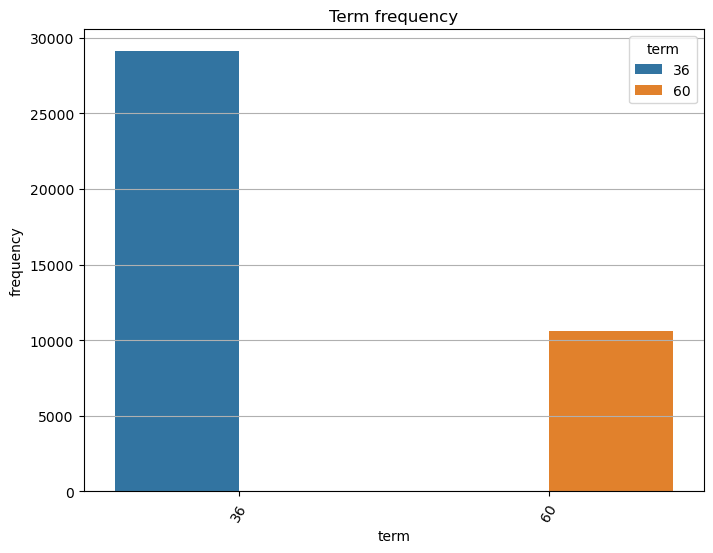

In [19]:
disp_countplot('term', 'Term frequency')

In [20]:
df['loan_status'].value_counts()


loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

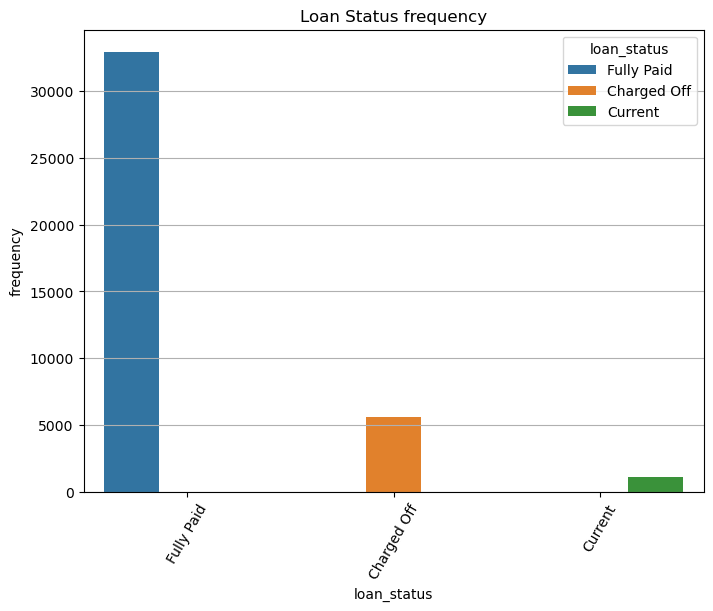

In [21]:
disp_countplot('loan_status', 'Loan Status frequency')

In [22]:
## filtering out 'Current'

df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]



In [23]:
df['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

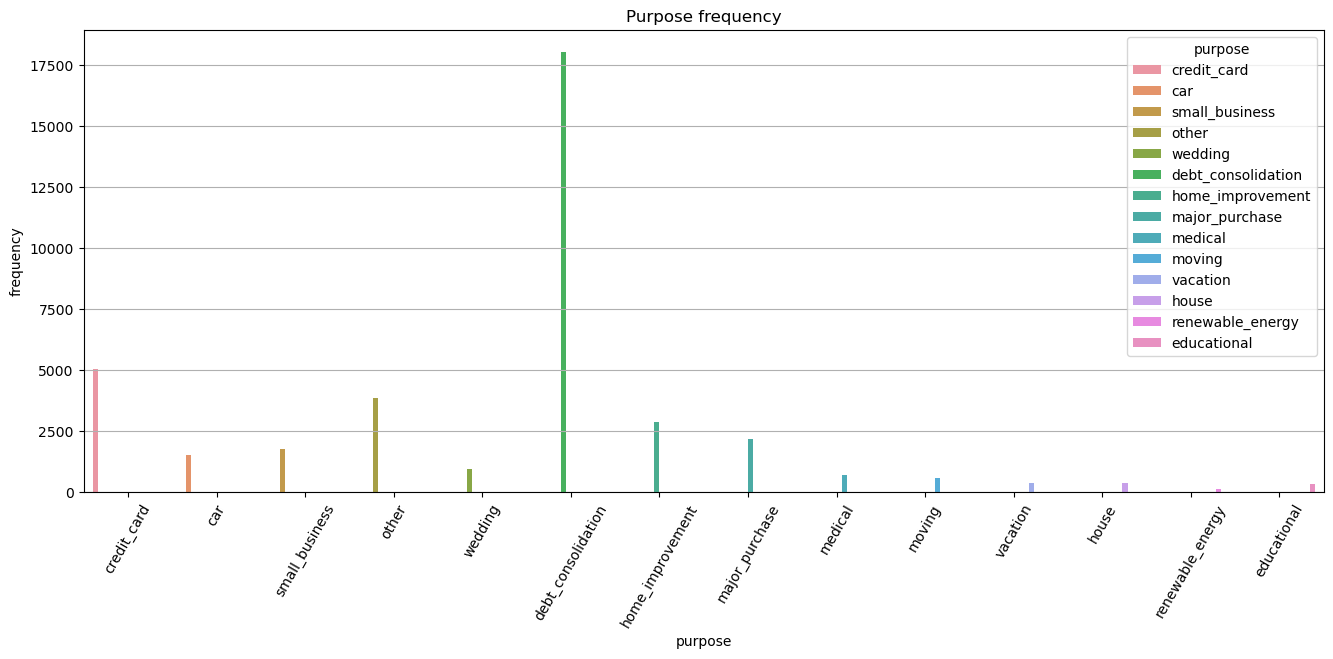

In [24]:
disp_countplot('purpose', 'Purpose frequency', fig_size=(16,6))

In [25]:
df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

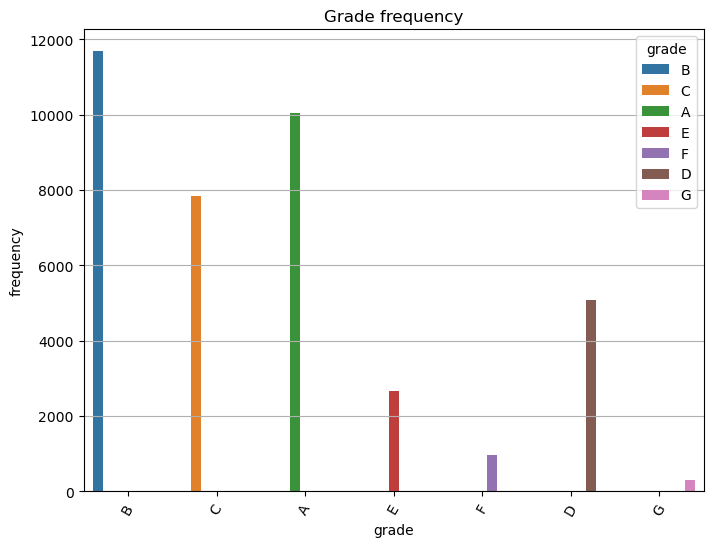

In [26]:
disp_countplot('grade', 'Grade frequency')

In [27]:
df['sub_grade'].value_counts()

sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

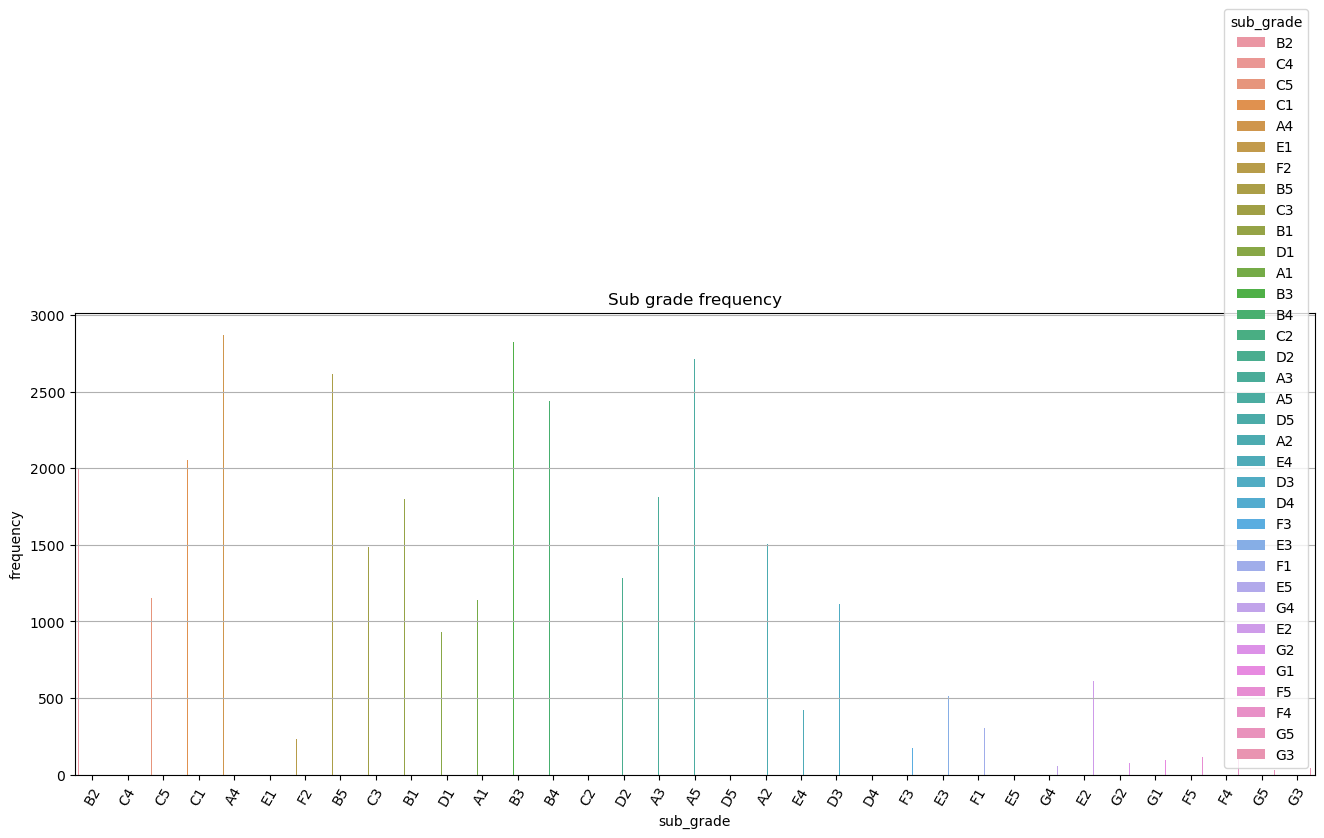

In [28]:
disp_countplot('sub_grade', 'Sub grade frequency', fig_size=(16,6))

In [29]:
df['emp_length'].value_counts()

emp_length
10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: count, dtype: int64

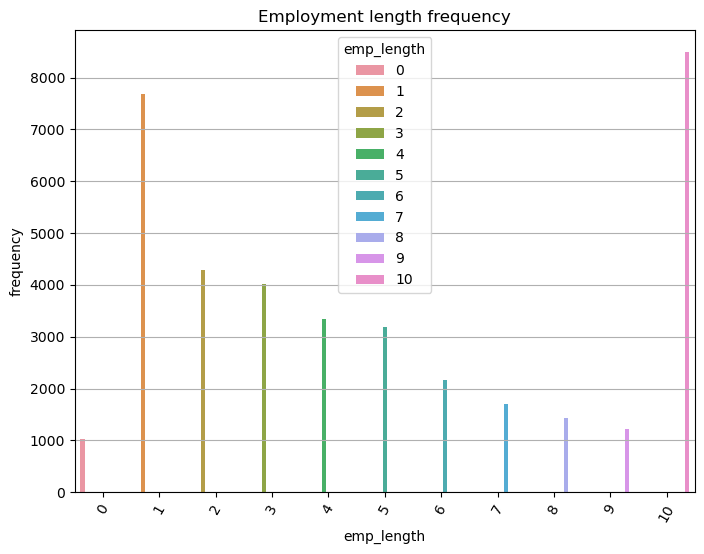

In [30]:
disp_countplot('emp_length', 'Employment length frequency')

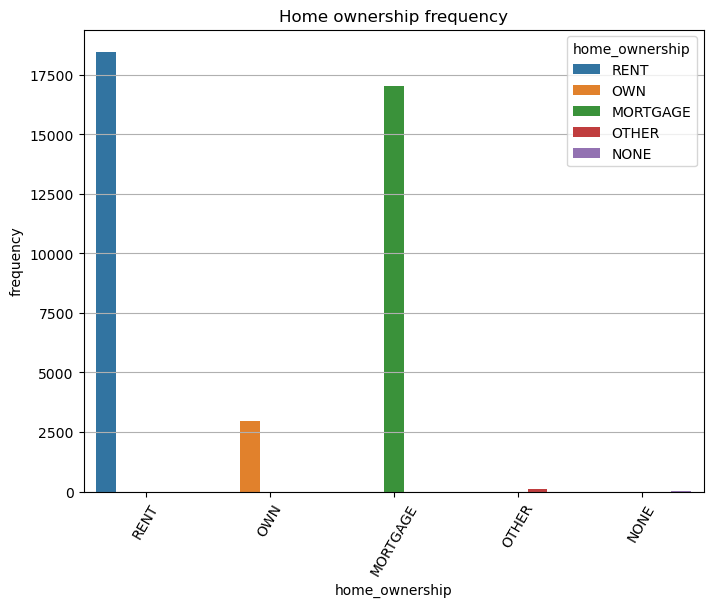

In [31]:
disp_countplot('home_ownership', 'Home ownership frequency')

In [32]:
def parse_year(year):
    if year < 11:
        return 2000 + year
    else:
        return 1900 + year

def yr_segments(emp_length) :
        if emp_length <= 2 :
            return 'Junior'
        elif emp_length <= 5 :
            return 'Middle'
        elif emp_length <= 8 :
            return 'Middle Senior'
        else:
            return 'Senior'
        

def create_bins_whole(column, num_bins) :
    min_val = df[column].min()
    max_val = df[column].max()
    _bins = [i for i in range(min_val, max_val+1, (max_val-min_val)//num_bins)]
    return pd.cut(df[column], bins=_bins)

def create_bins(column, num_bins) :
    min_val = df[column].min()
    max_val = df[column].max()
    _bins = [min_val + i * ((max_val - min_val) / num_bins) for i in range(num_bins)] + [max_val]
    return pd.cut(df[column], bins=_bins)

In [33]:
df['loan_amnt_categories'] = create_bins_whole('loan_amnt', 6)
df['annual_inc_categories']  = create_bins('annual_inc', 6) #pd.qcut(df['annual_inc'], q=6)
df['installment_categories'] = create_bins('installment', 6)
df['dti_categories'] = create_bins('dti', 6)
df['earliest_cr_line_yr'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y').dt.strftime('%y').apply(lambda x: parse_year(int(x)))
df['earliest_cr_line_yr_categories']= create_bins_whole('earliest_cr_line_yr', 6) 
df['revol_bal_categories'] = create_bins('revol_bal', 6)
df['revol_util_categories'] = create_bins('revol_util', 6)
df['total_acc_categories'] = create_bins('total_acc', 6)
df['total_pymnt_inv_categories'] = create_bins('total_pymnt_inv', 6)
df['total_rec_prncp_categories'] = create_bins('total_rec_prncp',6)
df['total_rec_int_categories'] = create_bins('total_rec_int',6)
df['last_pymnt_amnt_categories'] = create_bins('last_pymnt_amnt',6)
df['emp_duration'] = df['emp_length'].apply(lambda x: yr_segments(x))

In [34]:
df['annual_inc_categories'].value_counts()

annual_inc_categories
(4000.0, 1003333.333]         38562
(1003333.333, 2002666.667]       11
(2002666.667, 3002000.0]          1
(3002000.0, 4001333.333]          1
(5000666.667, 6000000.0]          1
(4001333.333, 5000666.667]        0
Name: count, dtype: int64

In [35]:
## drop outliers
q25 = df['annual_inc'].quantile(0.25)
q75 = df['annual_inc'].quantile(0.75)

df = df[(df['annual_inc'] > q25) & (df['annual_inc'] < q75)]

df['annual_inc_categories']  = create_bins('annual_inc', 6) 

In [36]:
df['annual_inc_categories'].value_counts()

annual_inc_categories
(47006.66, 54005.32]    4110
(54005.32, 61003.98]    3894
(40008.0, 47006.66]     3450
(68002.64, 75001.3]     3086
(61003.98, 68002.64]    2818
(75001.3, 81999.96]     1790
Name: count, dtype: int64

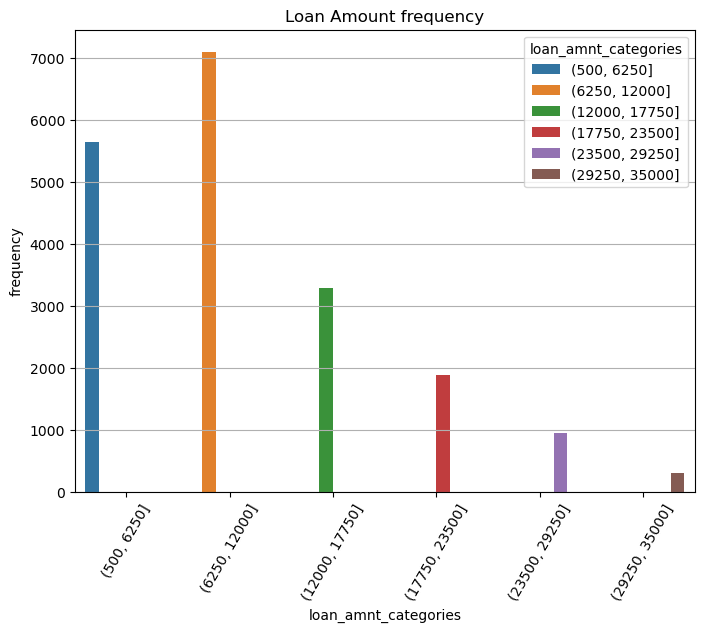

In [37]:
disp_countplot('loan_amnt_categories', 'Loan Amount frequency')

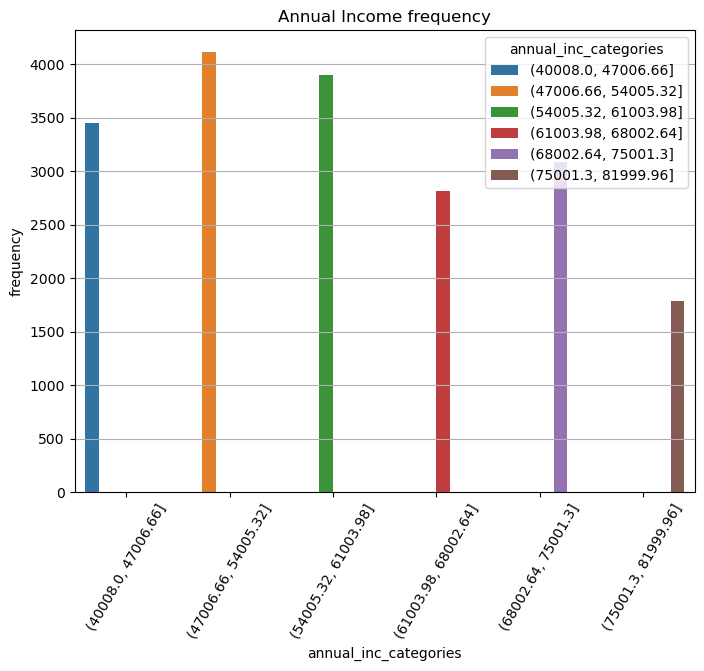

In [38]:
disp_countplot('annual_inc_categories', 'Annual Income frequency')

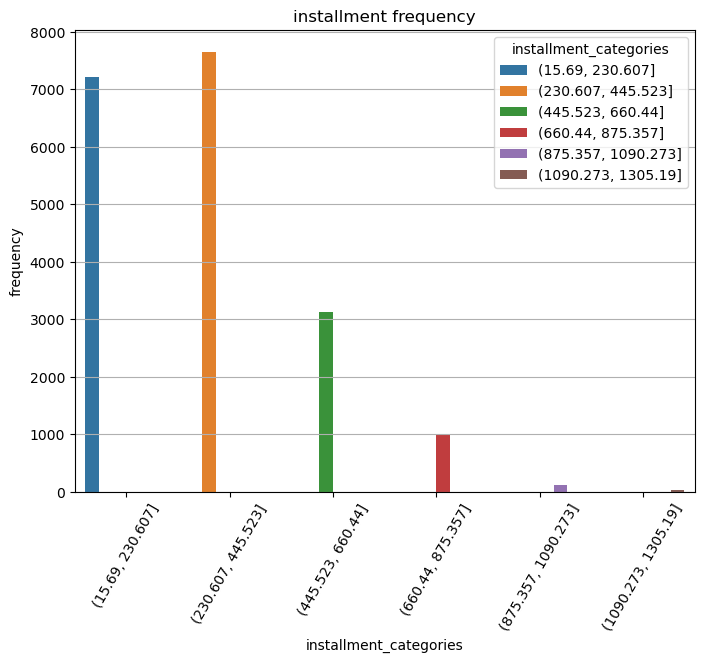

In [39]:
disp_countplot('installment_categories', 'installment frequency')

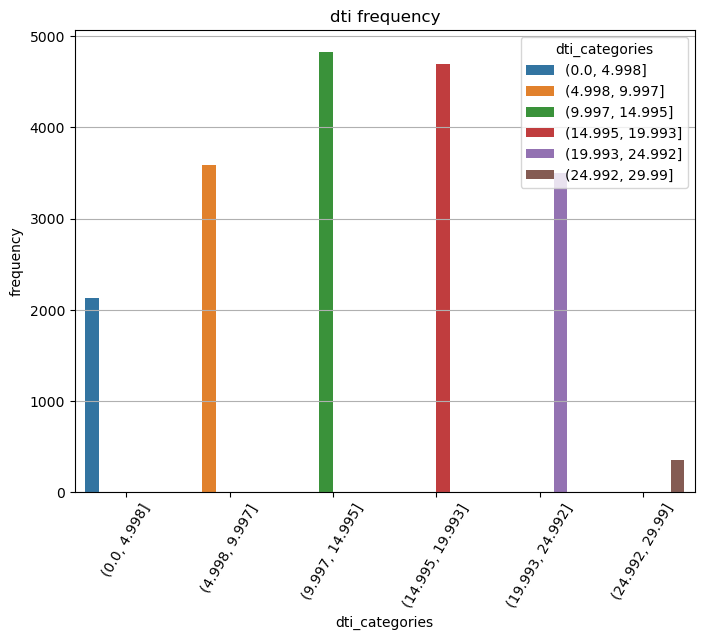

In [40]:
disp_countplot('dti_categories', 'dti frequency')

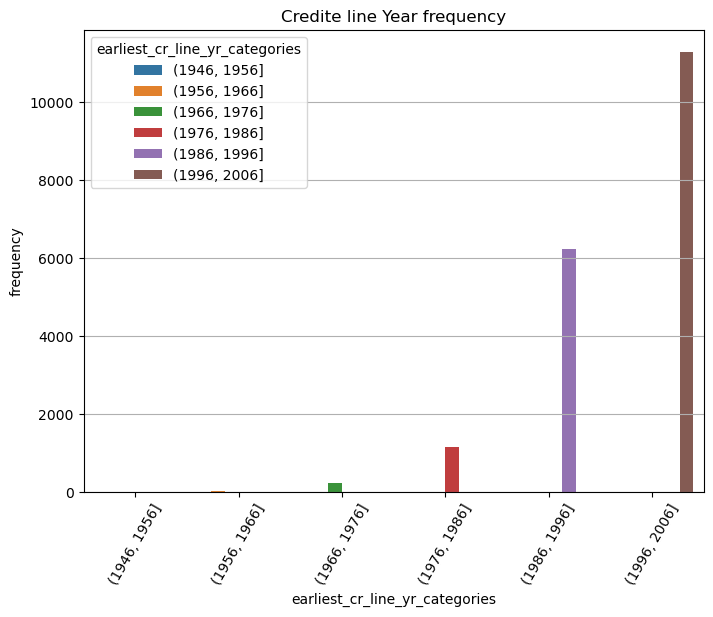

In [41]:
disp_countplot('earliest_cr_line_yr_categories', 'Credite line Year frequency')

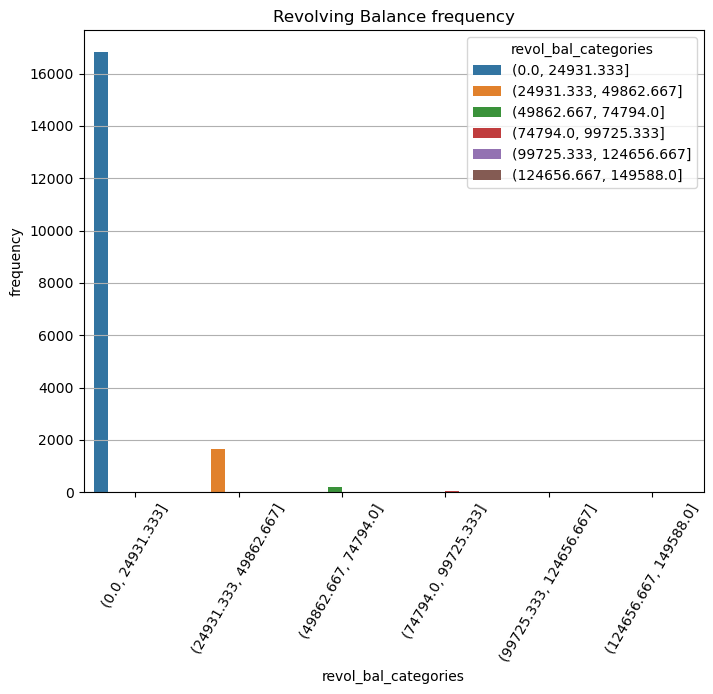

In [42]:
disp_countplot('revol_bal_categories', 'Revolving Balance frequency')

In [43]:
df['emp_duration'].value_counts()

emp_duration
Junior           5844
Middle           5377
Senior           5139
Middle Senior    2789
Name: count, dtype: int64

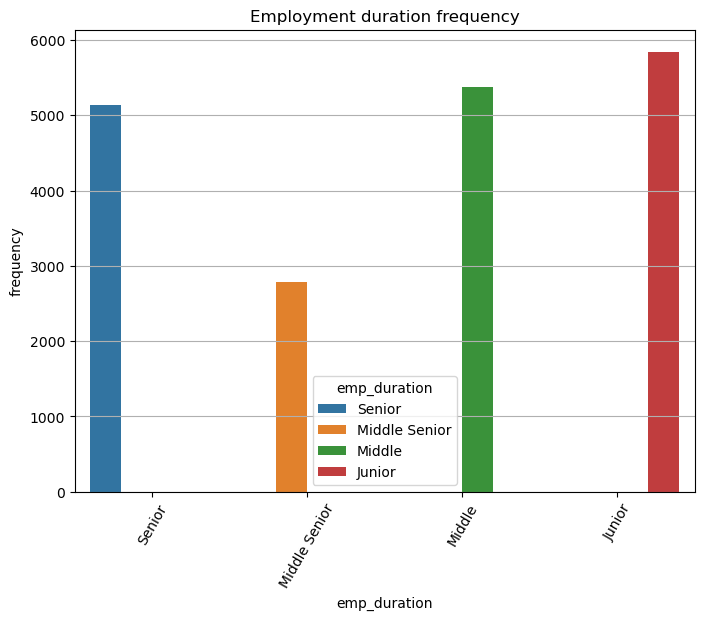

In [44]:
disp_countplot('emp_duration', 'Employment duration frequency')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19149 entries, 3 to 39711
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   loan_amnt                       19149 non-null  int64   
 1   funded_amnt                     19149 non-null  int64   
 2   funded_amnt_inv                 19149 non-null  float64 
 3   term                            19149 non-null  int32   
 4   int_rate                        19149 non-null  float64 
 5   installment                     19149 non-null  float64 
 6   grade                           19149 non-null  object  
 7   sub_grade                       19149 non-null  object  
 8   emp_length                      19149 non-null  int32   
 9   home_ownership                  19149 non-null  object  
 10  annual_inc                      19149 non-null  float64 
 11  verification_status             19149 non-null  object  
 12  issue_d                

In [46]:
def disp_barplot(x_col, y_col, fig_size=(8,6)):
    plt.figure(figsize=fig_size)
    sns.barplot(x=x_col, y=y_col, data=df, hue=x_col)
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.show()

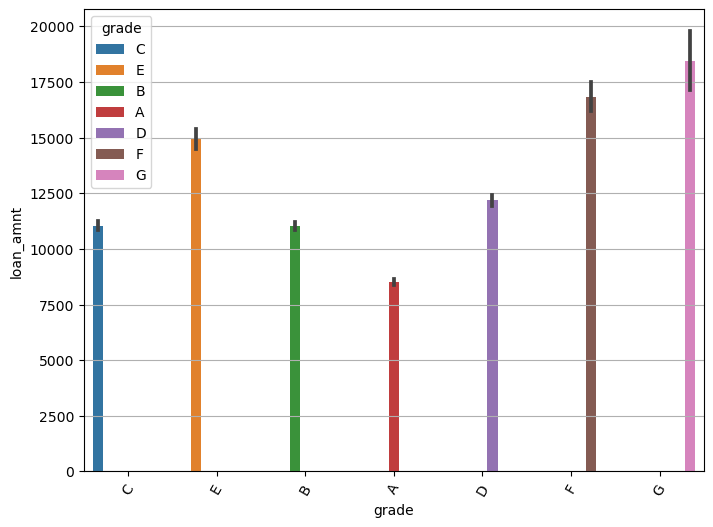

In [47]:
disp_barplot('grade', 'loan_amnt')

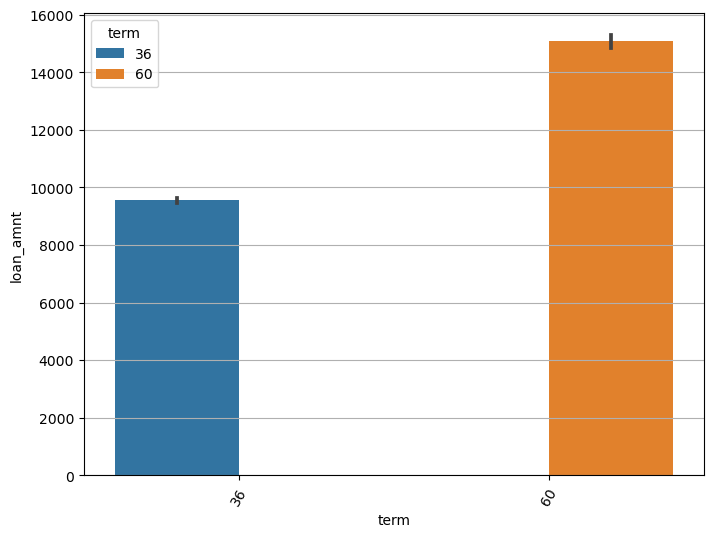

In [48]:
disp_barplot('term', 'loan_amnt')

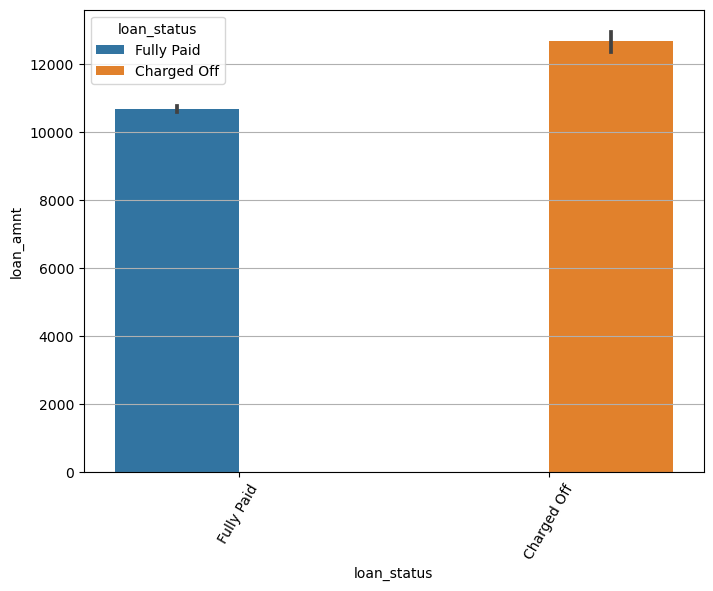

In [49]:
disp_barplot('loan_status', 'loan_amnt')

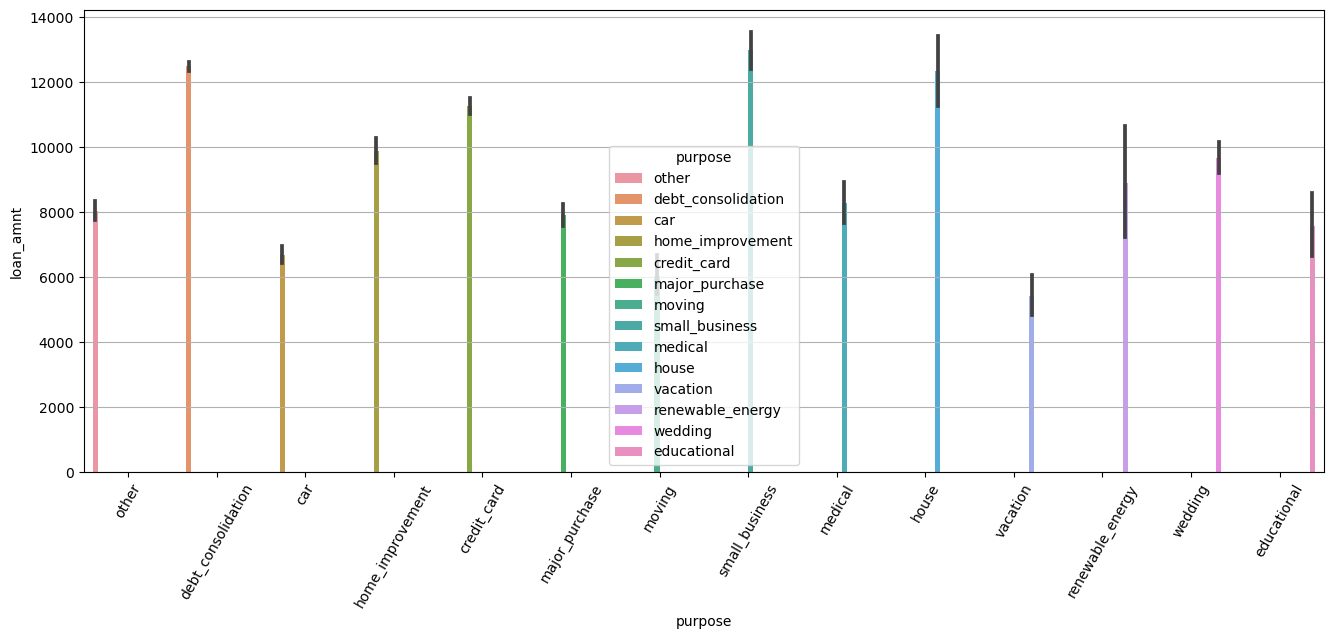

In [50]:
disp_barplot('purpose', 'loan_amnt', fig_size=(16,6))

In [51]:
def disp_boxplot(x_col, y_col, fig_size=(8, 6)):
    plt.figure(figsize=fig_size)
    sns.boxplot(x=x_col, y=y_col, data =df)
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.show()

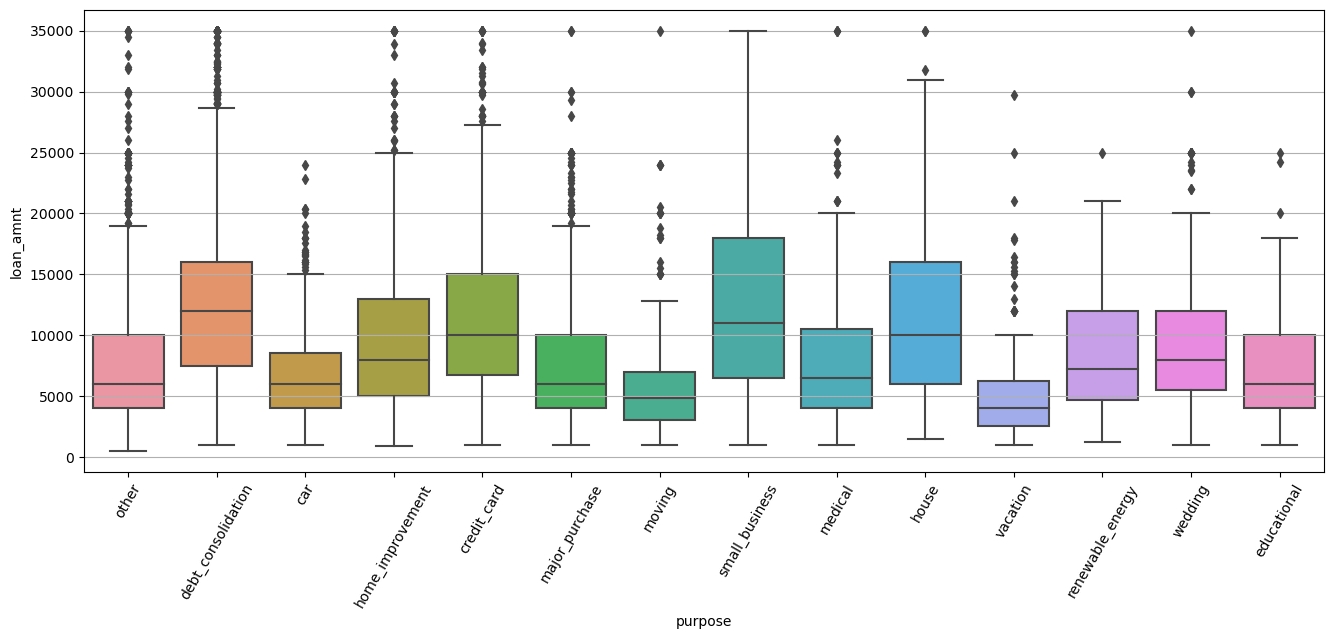

In [52]:
disp_boxplot('purpose', 'loan_amnt', (16, 6))

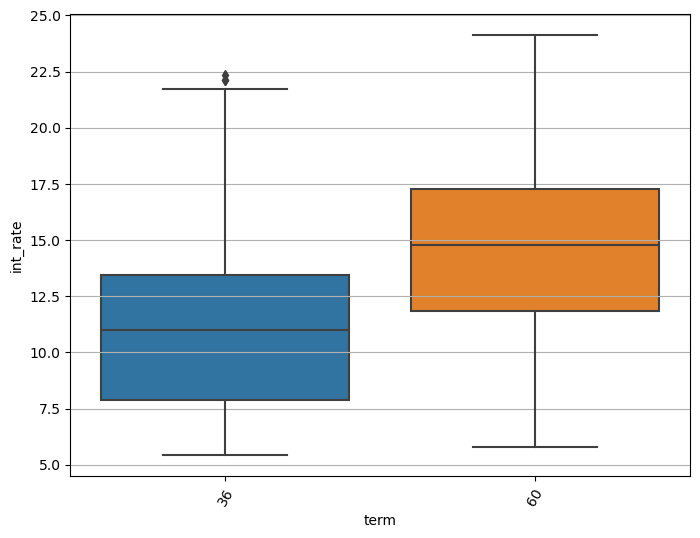

In [53]:
disp_boxplot('term', 'int_rate')

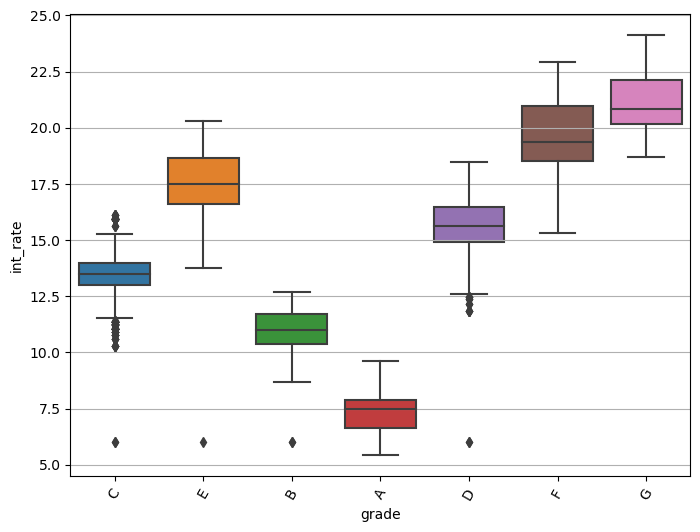

In [54]:
disp_boxplot('grade', 'int_rate')

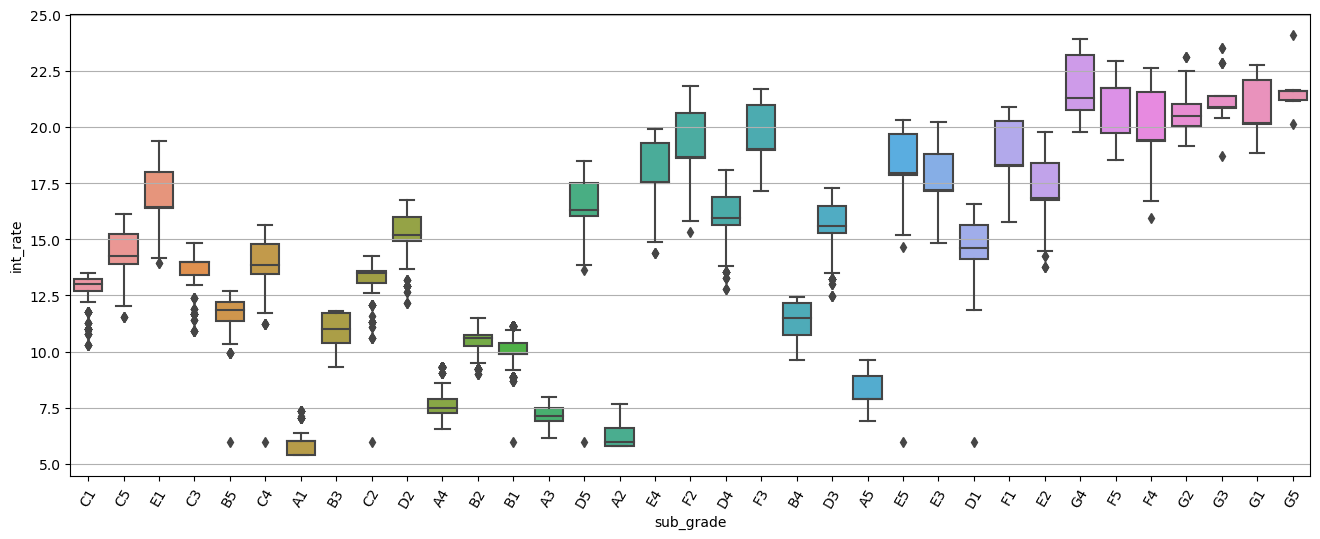

In [55]:
disp_boxplot('sub_grade', 'int_rate', (16, 6))

<Axes: title={'center': 'Heatmap'}>

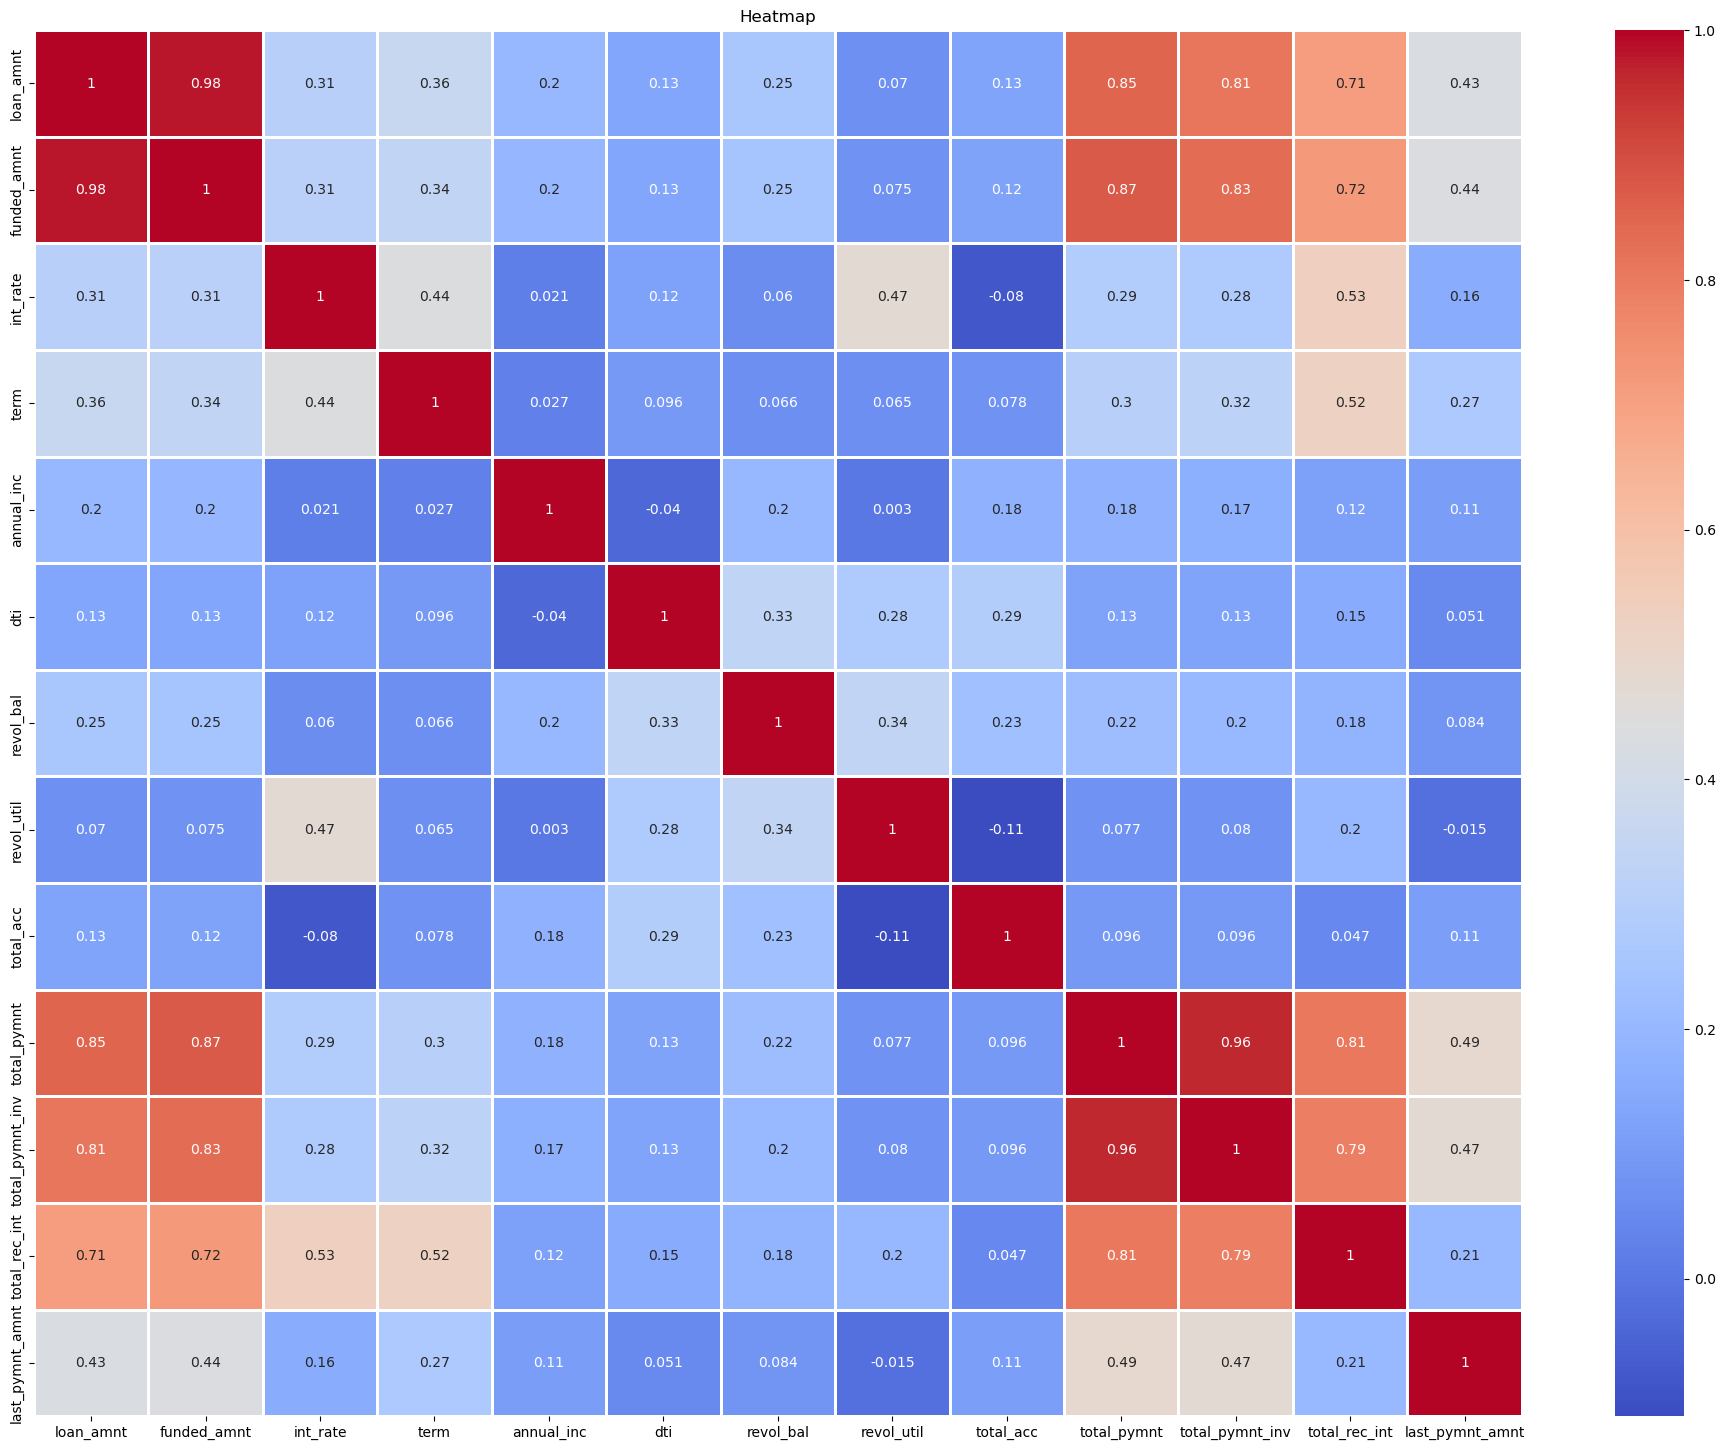

In [56]:
#'out_prncp','out_prncp_inv'
selected_cols = ['loan_amnt','funded_amnt','int_rate','term', 'annual_inc','dti', 'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','last_pymnt_amnt']

plt.figure(figsize=(24, 18))
plt.title('Heatmap')
sns.heatmap(df[selected_cols].corr(), cmap='coolwarm', annot=True, linewidths=1.0)




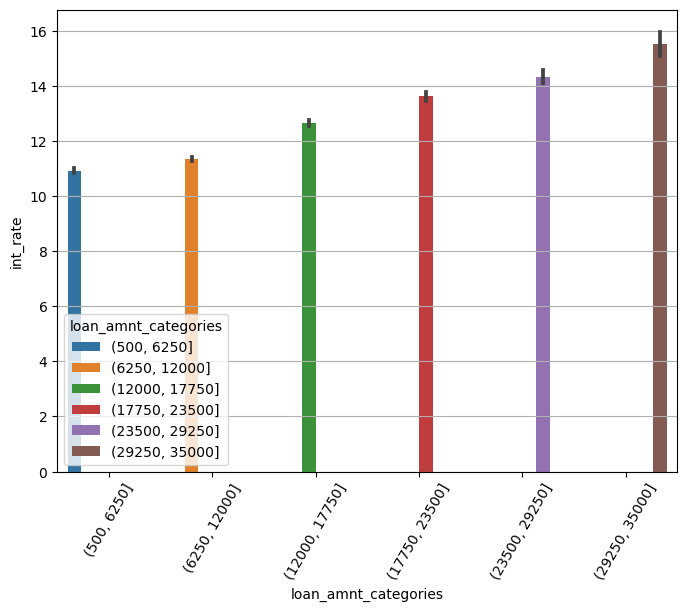

In [57]:
disp_barplot('loan_amnt_categories', 'int_rate')

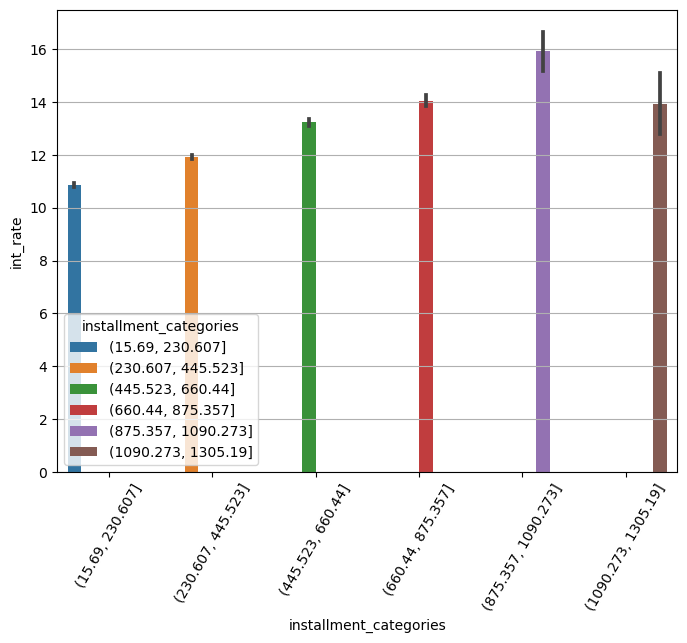

In [58]:
disp_barplot('installment_categories', 'int_rate')

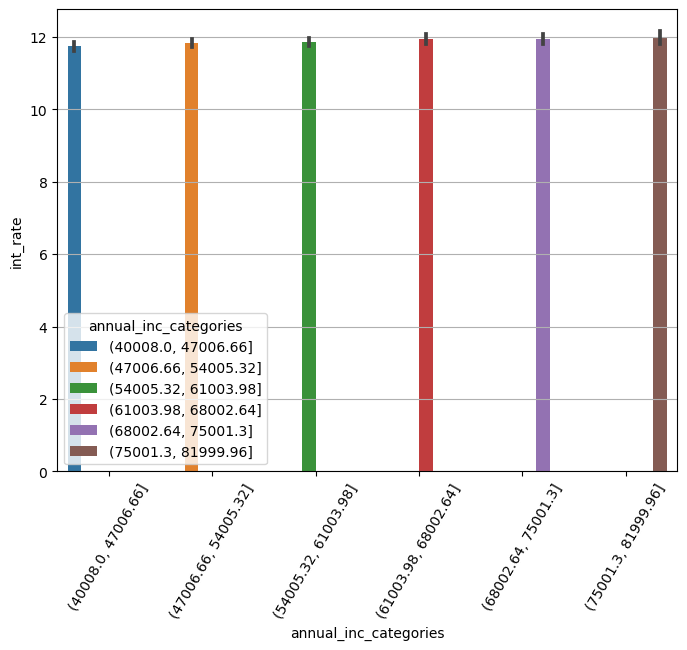

In [59]:
disp_barplot('annual_inc_categories', 'int_rate')

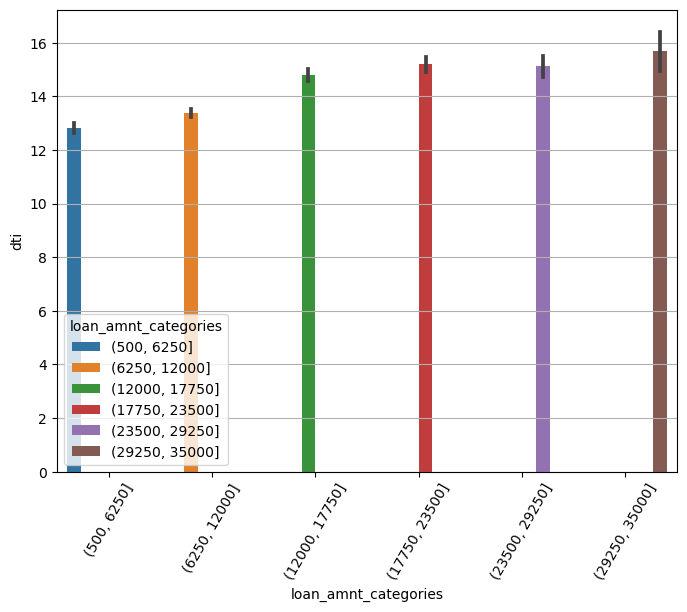

In [60]:
disp_barplot('loan_amnt_categories', 'dti')

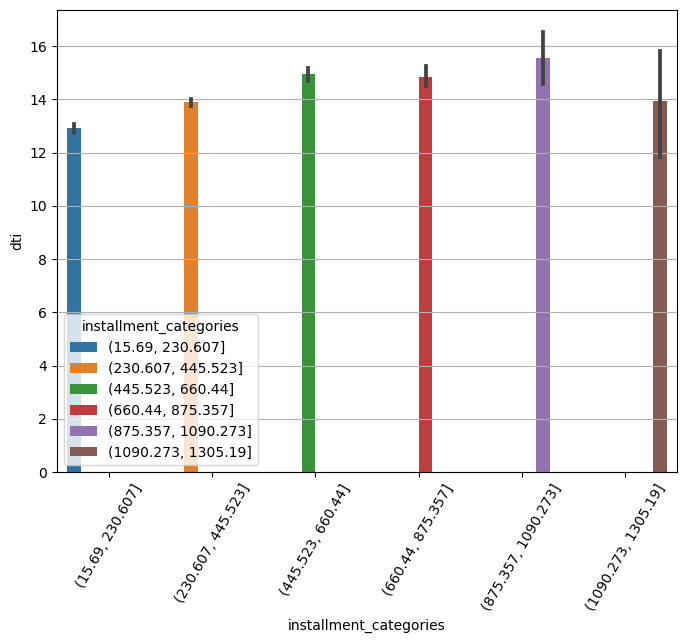

In [61]:
disp_barplot('installment_categories', 'dti')

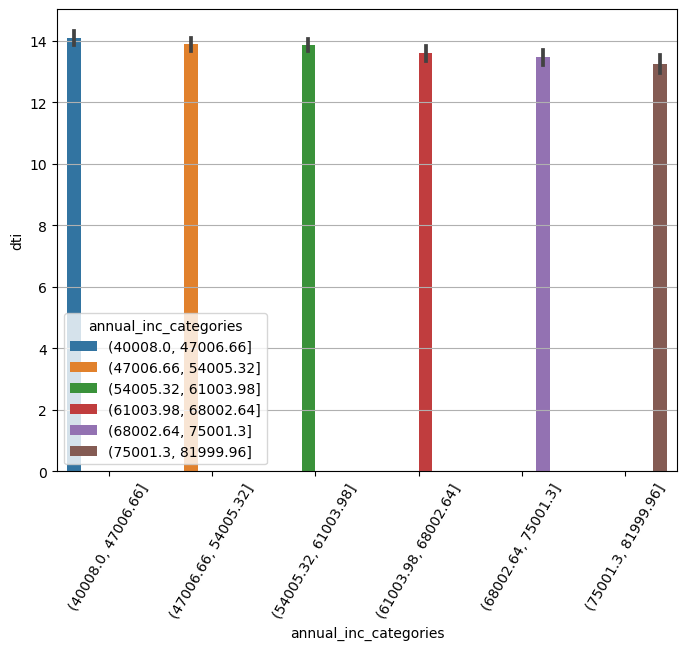

In [62]:
disp_barplot('annual_inc_categories', 'dti')

In [63]:
defaulters = df[df['loan_status'] == 'Charged Off']
def display_pc_chareg_off_plot(column, title, xlabel, fig_size=(8, 6)) :
    defaulter_percent = defaulters.groupby(column, observed=False).size().div(df.groupby(column, observed=False).size()).mul(100)
    plt.figure(figsize=fig_size)
    sns.barplot(x=defaulter_percent.index, y=defaulter_percent.values, color='orange')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Charged Off %')
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.show()


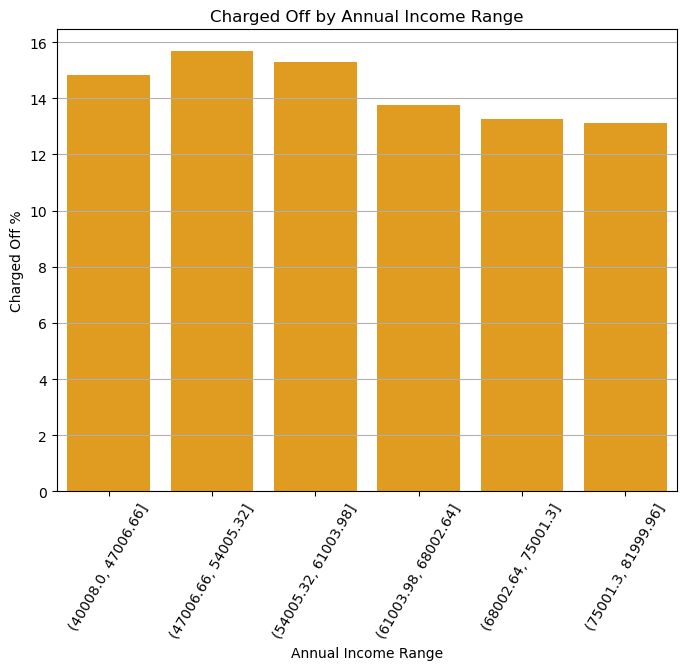

In [64]:
display_pc_chareg_off_plot('annual_inc_categories', 'Charged Off by Annual Income Range', 'Annual Income Range')

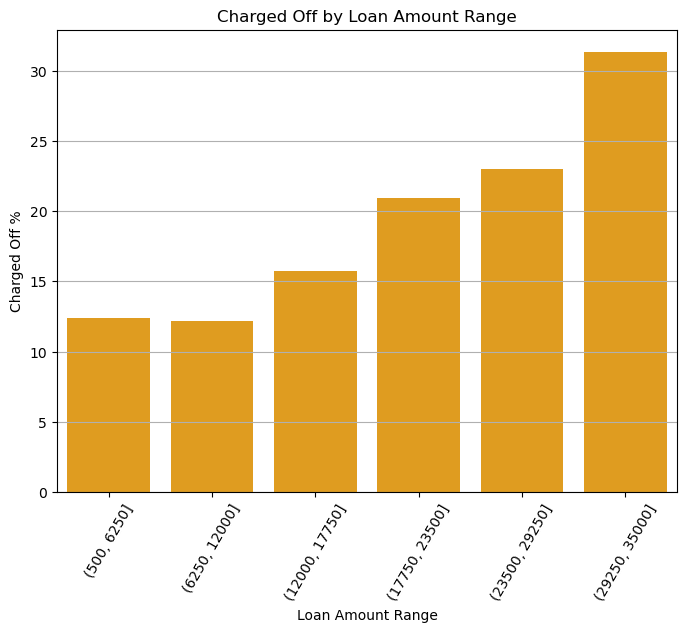

In [65]:
display_pc_chareg_off_plot('loan_amnt_categories', 'Charged Off by Loan Amount Range', 'Loan Amount Range')

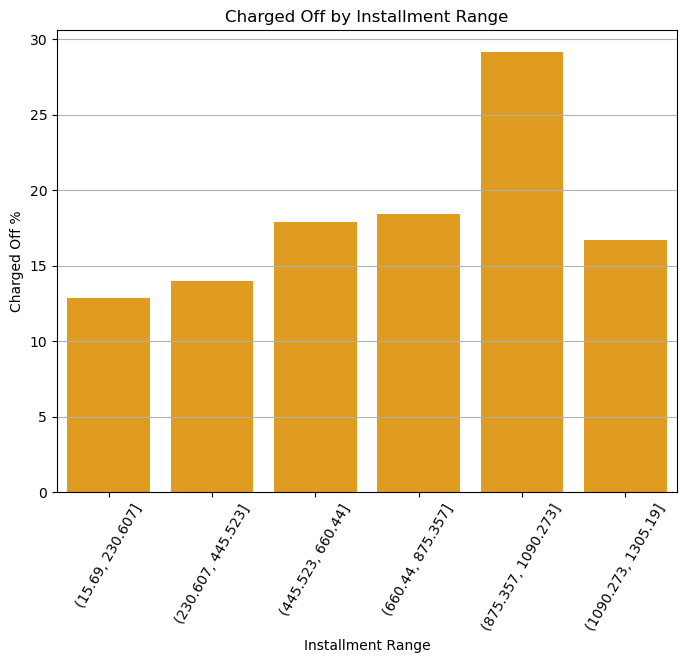

In [66]:
display_pc_chareg_off_plot('installment_categories', 'Charged Off by Installment Range', 'Installment Range')

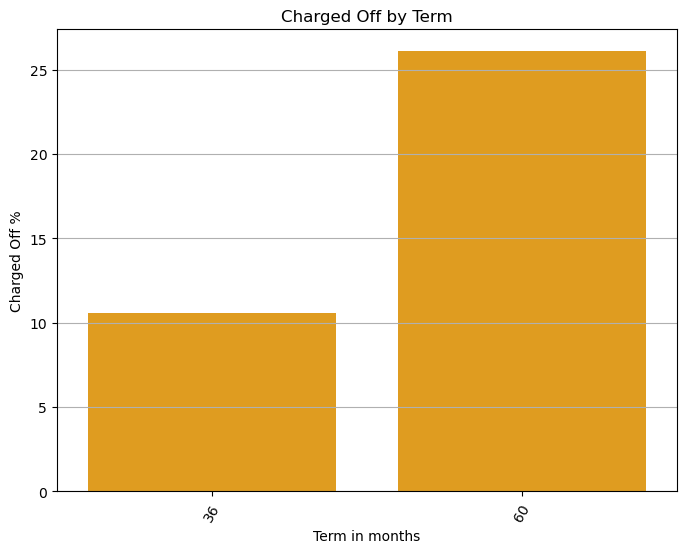

In [67]:
display_pc_chareg_off_plot('term', 'Charged Off by Term', 'Term in months')

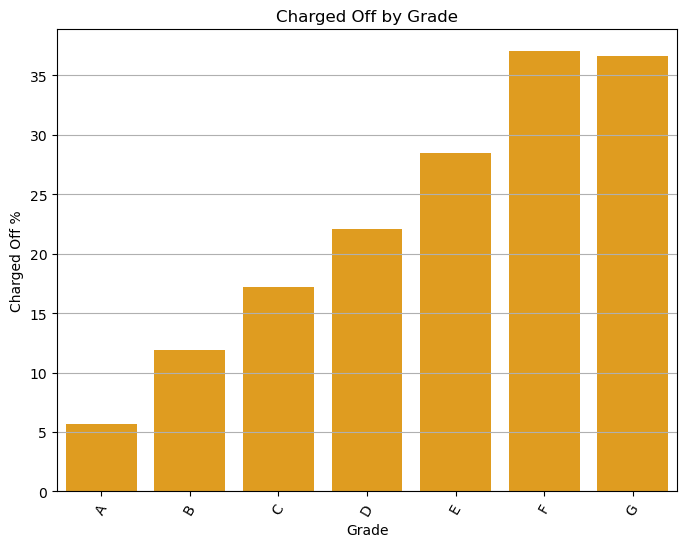

In [68]:
display_pc_chareg_off_plot('grade', 'Charged Off by Grade', 'Grade')

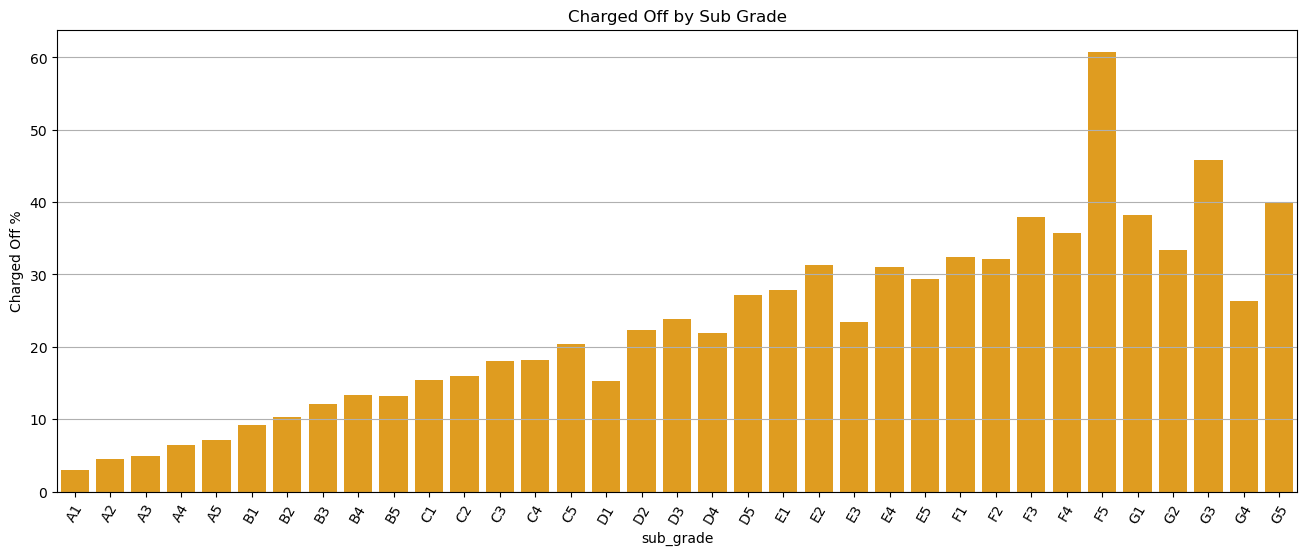

In [69]:
display_pc_chareg_off_plot('sub_grade', 'Charged Off by Sub Grade', 'sub_grade', fig_size=(16,6))

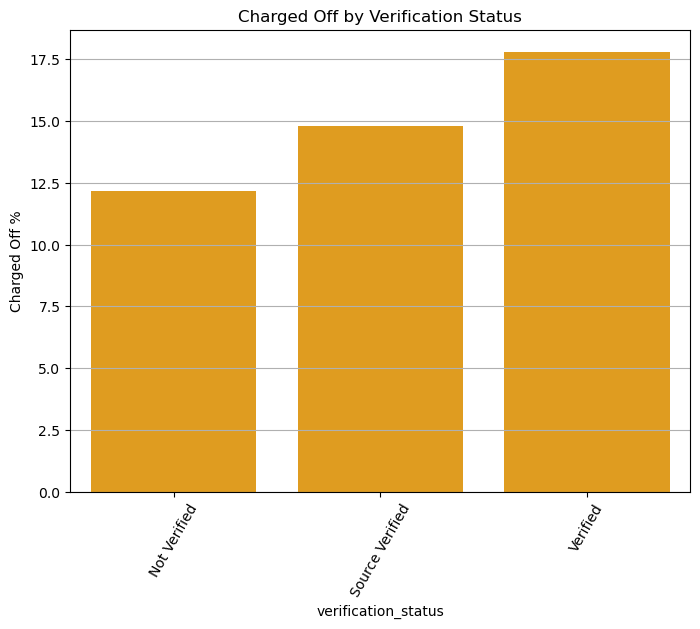

In [70]:
display_pc_chareg_off_plot('verification_status', 'Charged Off by Verification Status', 'verification_status')

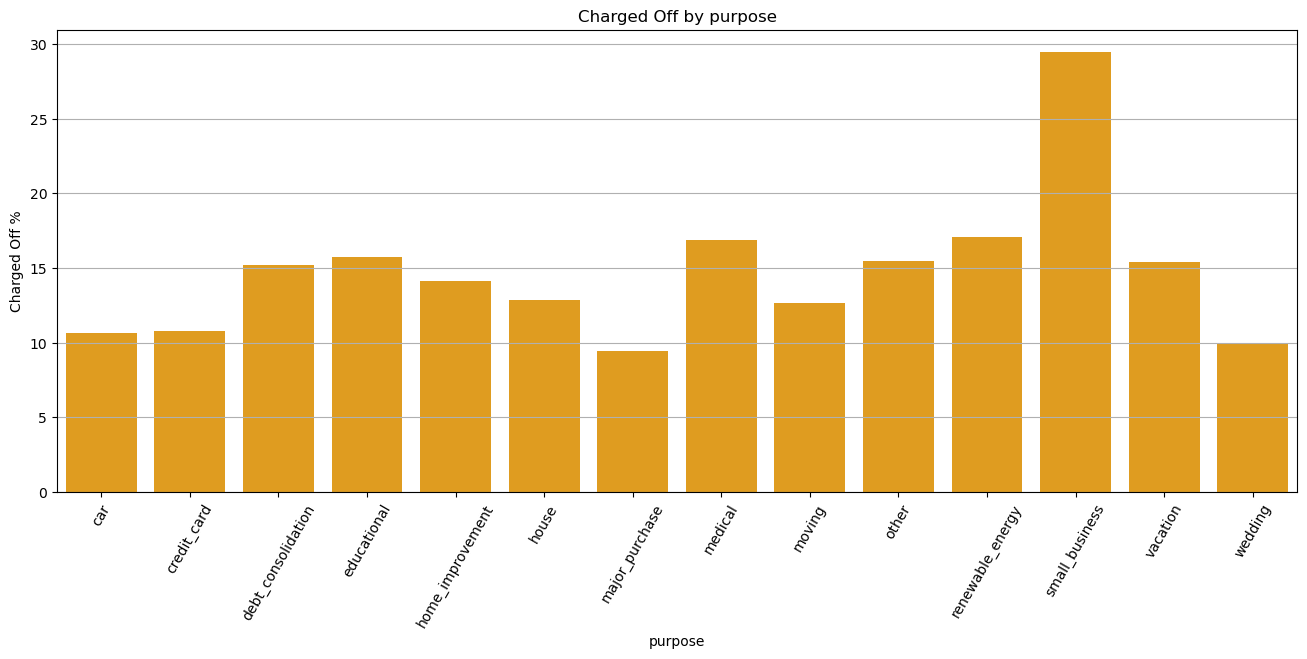

In [71]:
display_pc_chareg_off_plot('purpose', 'Charged Off by purpose', 'purpose', fig_size=(16,6))

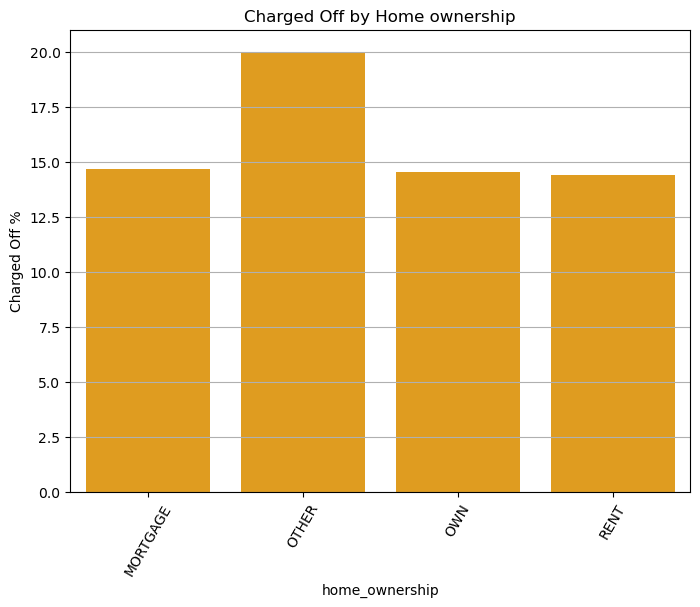

In [72]:
display_pc_chareg_off_plot('home_ownership', 'Charged Off by Home ownership', 'home_ownership')

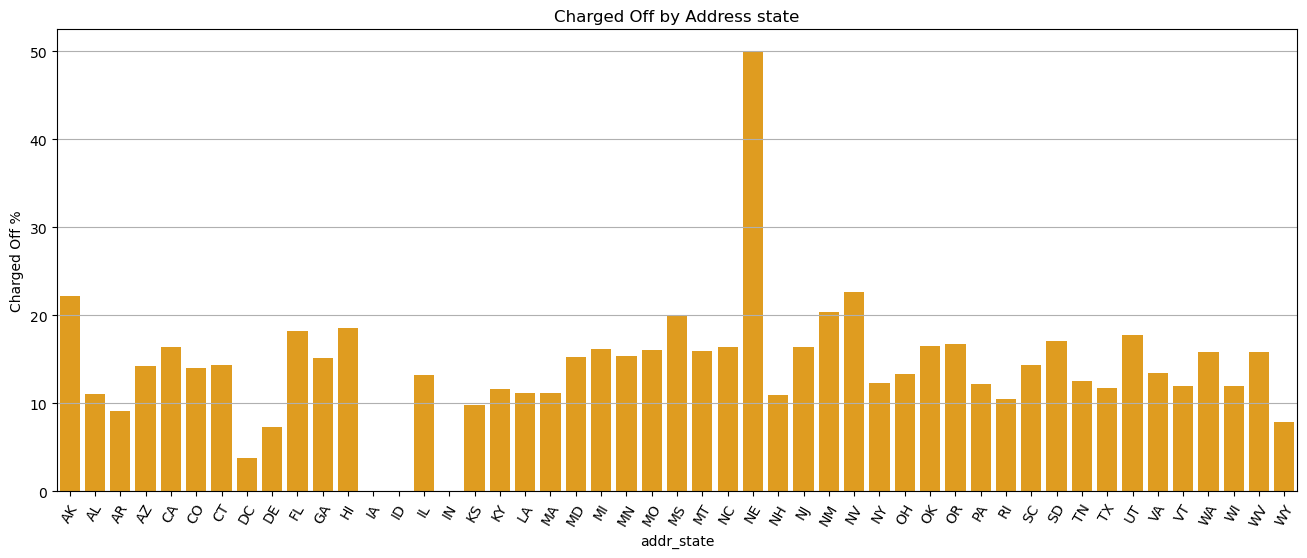

In [73]:
display_pc_chareg_off_plot('addr_state', 'Charged Off by Address state', 'addr_state', fig_size=(16,6))

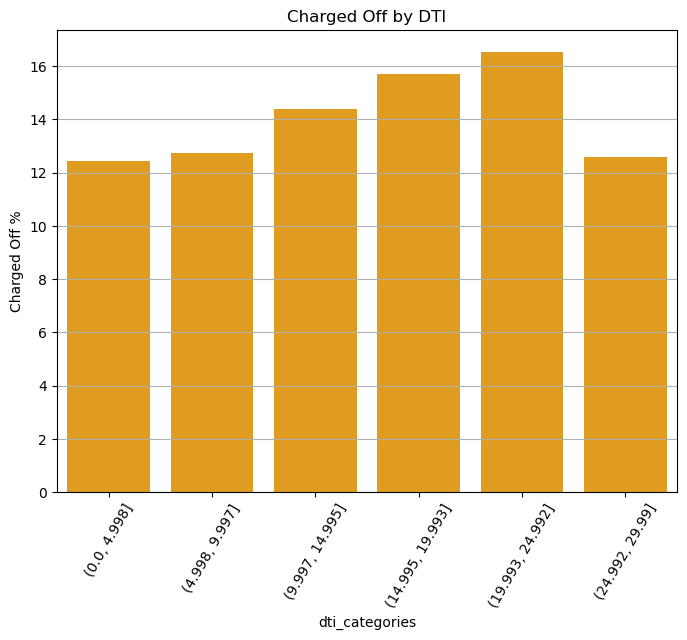

In [74]:
display_pc_chareg_off_plot('dti_categories', 'Charged Off by DTI', 'dti_categories')

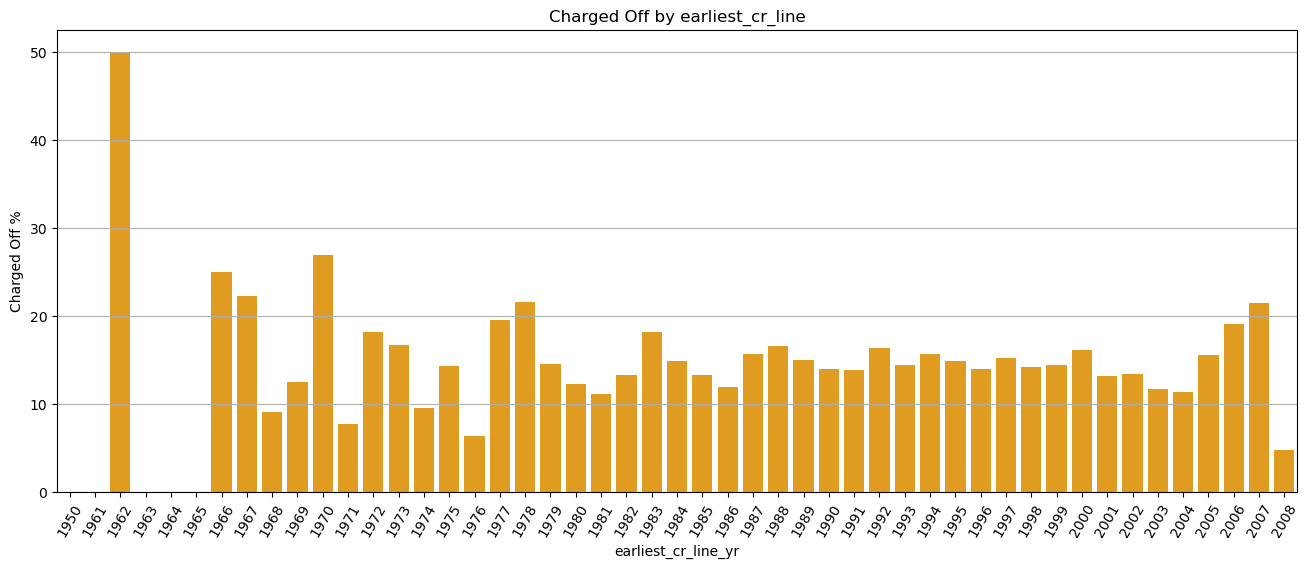

In [75]:
display_pc_chareg_off_plot('earliest_cr_line_yr', 'Charged Off by earliest_cr_line', 'earliest_cr_line_yr', fig_size=(16,6))

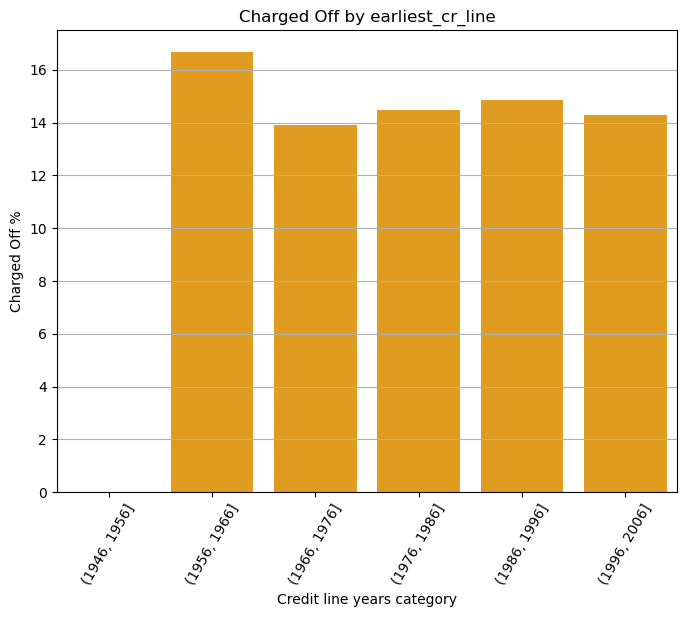

In [76]:
display_pc_chareg_off_plot('earliest_cr_line_yr_categories', 'Charged Off by earliest_cr_line', 'Credit line years category')

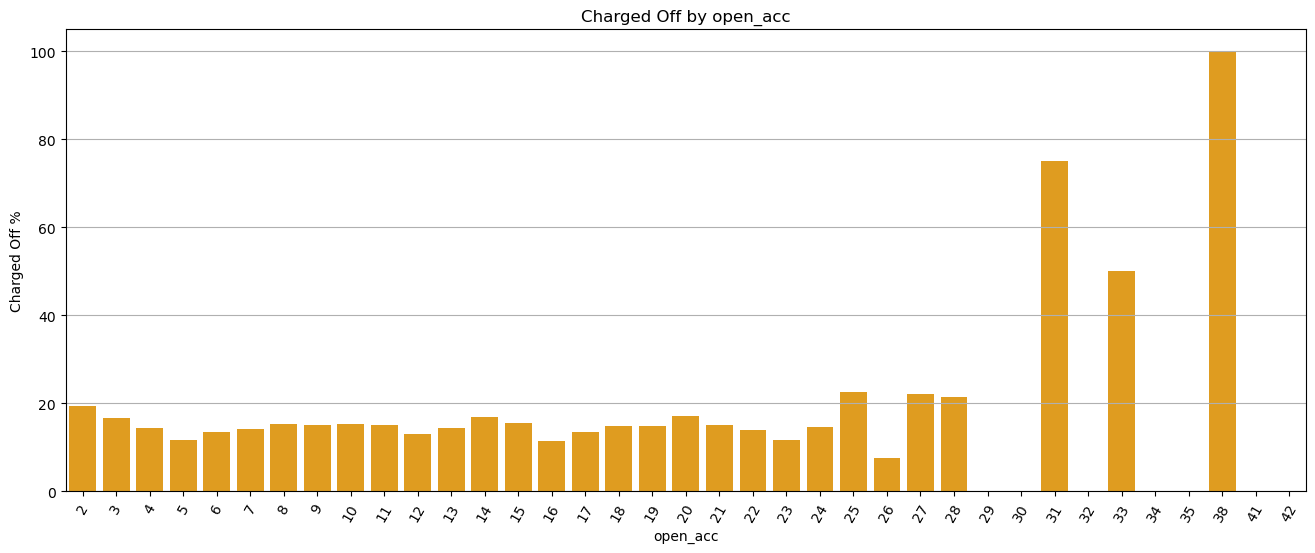

In [77]:
display_pc_chareg_off_plot('open_acc', 'Charged Off by open_acc', 'open_acc', fig_size=(16,6))

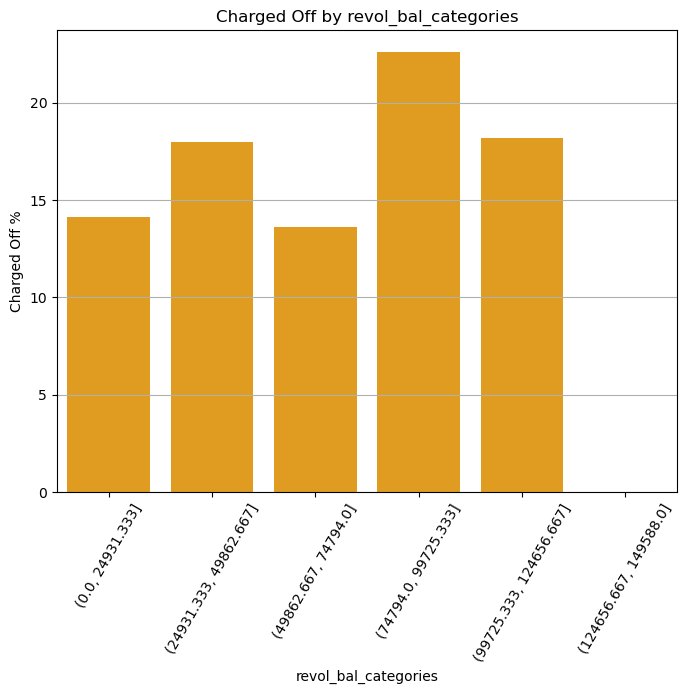

In [78]:
display_pc_chareg_off_plot('revol_bal_categories', 'Charged Off by revol_bal_categories', 'revol_bal_categories')

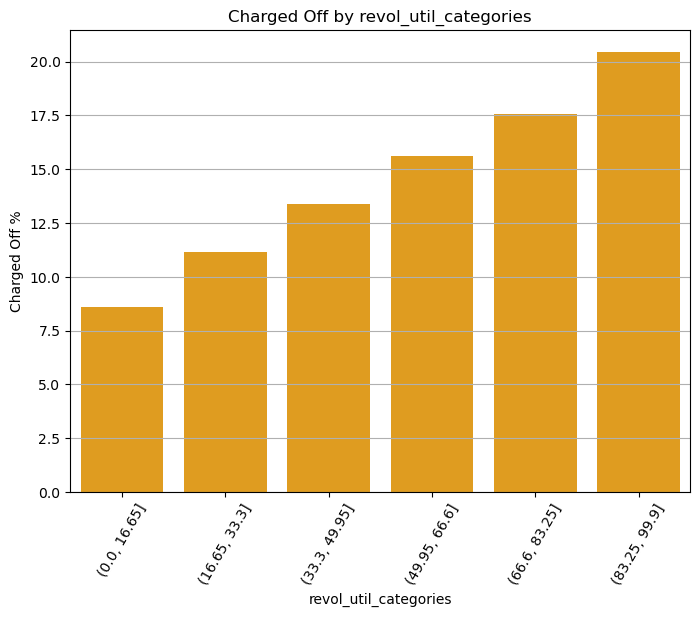

In [79]:
display_pc_chareg_off_plot('revol_util_categories', 'Charged Off by revol_util_categories', 'revol_util_categories')

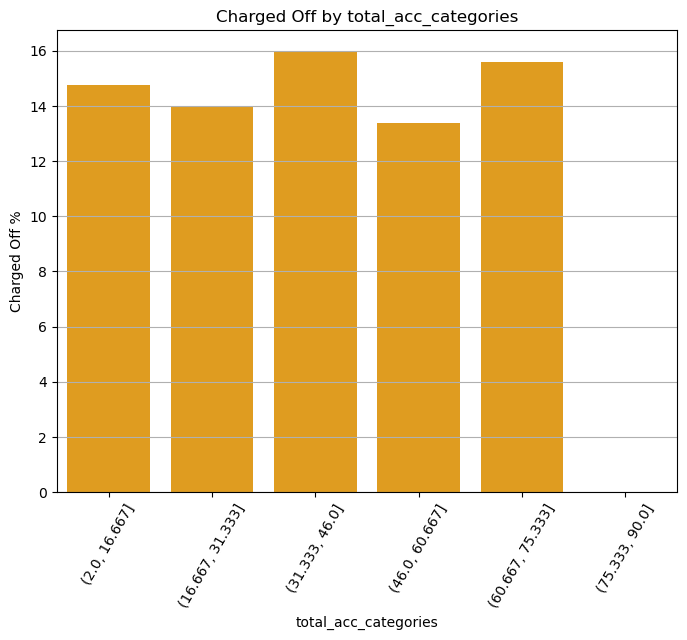

In [80]:
display_pc_chareg_off_plot('total_acc_categories', 'Charged Off by total_acc_categories', 'total_acc_categories')

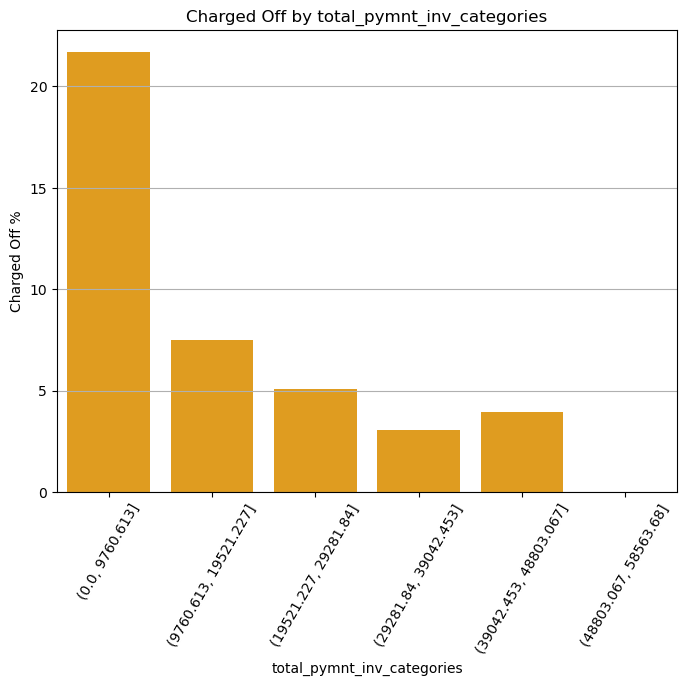

In [81]:
display_pc_chareg_off_plot('total_pymnt_inv_categories', 'Charged Off by total_pymnt_inv_categories', 'total_pymnt_inv_categories')

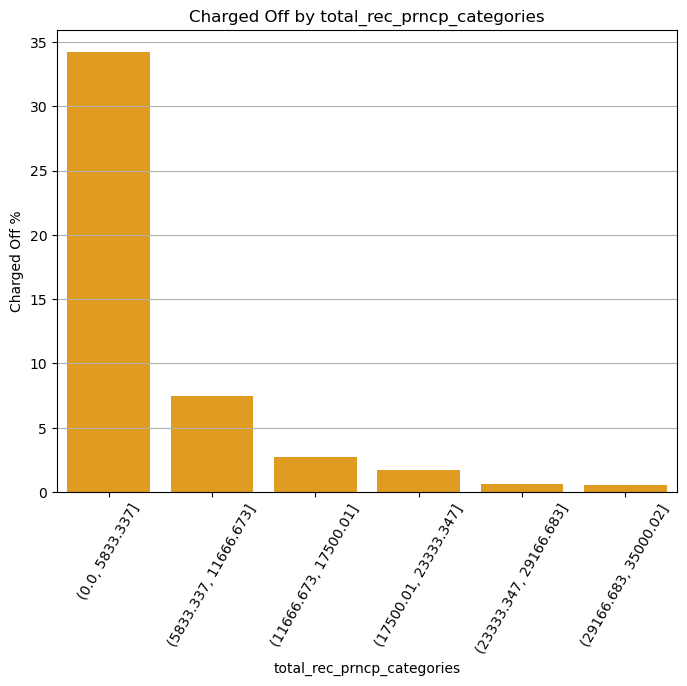

In [82]:
display_pc_chareg_off_plot('total_rec_prncp_categories', 'Charged Off by total_rec_prncp_categories', 'total_rec_prncp_categories')

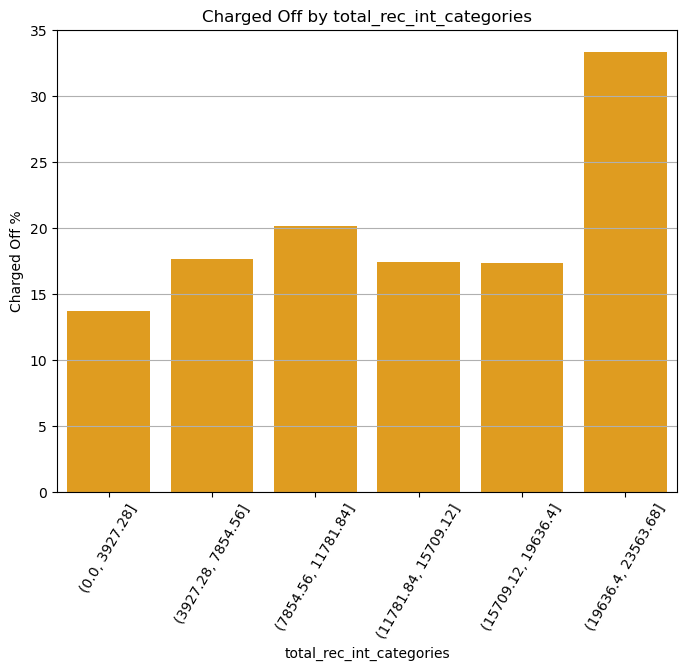

In [83]:
display_pc_chareg_off_plot('total_rec_int_categories', 'Charged Off by total_rec_int_categories', 'total_rec_int_categories')

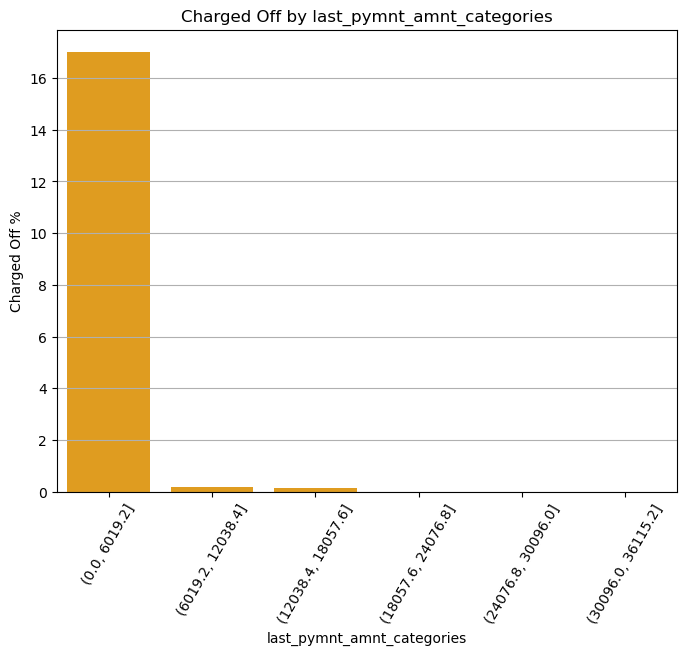

In [84]:
display_pc_chareg_off_plot('last_pymnt_amnt_categories', 'Charged Off by last_pymnt_amnt_categories', 'last_pymnt_amnt_categories')

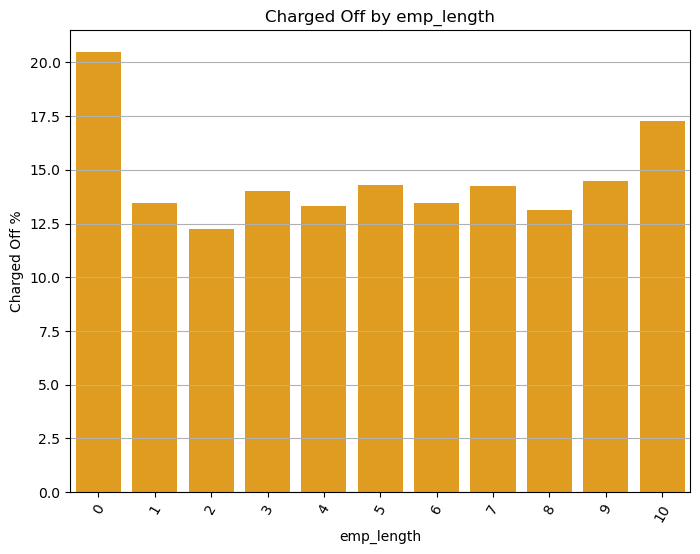

In [85]:
display_pc_chareg_off_plot('emp_length', 'Charged Off by emp_length', 'emp_length')

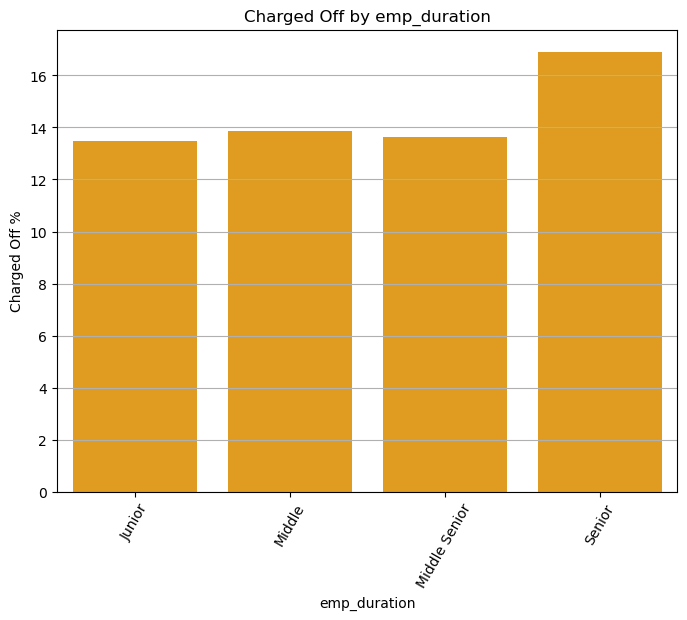

In [86]:
display_pc_chareg_off_plot('emp_duration', 'Charged Off by emp_duration', 'emp_duration')